# **Import Library**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Atau MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, root_mean_squared_error
%matplotlib inline

# **Load Data**

In [2]:
df = pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')

In [3]:
df

,Date,Location ISO Code,Location,Cases,Deaths,Recovered,Active Cases,Total Cases,Total Deaths,Total Recovered,...,Cases per Million,Total Cases per Million,Deaths per Million,Total Deaths per Million,Total Recovered per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.0,1.84,6.91,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.0,1.84,6.91,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,0.01,0.01,0.0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.0,0.00,0.16,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.0,1.84,6.91,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,14.01,19974.38,0.0,459.14,19303.27,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,2.36,18959.11,0.0,429.59,18492.75,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,1.95,10002.74,0.0,410.83,9553.94,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,3.36,10680.15,0.0,221.04,10415.14,22.10,2.07%,97.52%,1.92,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   Cases                        31822 non-null  int64  
 4   Deaths                       31822 non-null  int64  
 5   Recovered                    31822 non-null  int64  
 6   Active Cases                 31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# **Preprocessing Data**

Preproceesing Data merupakan proses yang dilakukan untuk pembersihan, transformasi, normalisasi, dan pengelolaan data kategorikal, yang bertujuan supaya model dapat bekerja lebih baik dan efisien.

## **Handling Missing Values And Cleaning Data**

<!DOCTYPE html>
<!DOCTYPE html>
<html>
<head>
    <style>
        h3{
            text-align:justify ;
            font-weight: bold;
        }
        .styled-text{
            text-align:justify ;
            font-size: 16 px;
            /* color: white; */
            margin: 30px;
            font-family: "Times New Roman";
            margin-bottom: 0.0;
            margin-top: 0.0;
        }
        .styled-img{
          position: absolute; top: 0px; right: 400px;
        }
    </style>
</head>
    <body>
        <img src='https://imgur.com/68u0dD2.png' class = 'styled-img'/>
    </body>
</html>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   Cases                        31822 non-null  int64  
 4   Deaths                       31822 non-null  int64  
 5   Recovered                    31822 non-null  int64  
 6   Active Cases                 31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [13]:
# Cek data yang kosong, NAN atau Rusak

# isnull() merupakan funtion untuk cek data yang kosong pada df
# sum() merupakan funtion untuk menjumlahkan data yang kosong pada df
# sort_values(Ascending=False) merupakan function untuk mengurutkan berdasarkan banyaknya data yang kosong pada df
#ascending=False artinya tidak diurutkan seusai urutan columns di df

print(df_cleane.isnull().sum().sort_values(ascending=False))

Growth Factor of Deaths        3447
Growth Factor of Cases         1939
Total Rural Villages            929
Province                        929
Total Urban Villages            904
Total Cities                    901
Date                              0
Recovered                         0
Cases                             0
Total Active Cases                0
Total Recovered                   0
Total Deaths                      0
Total Cases                       0
Deaths                            0
Area (km2)                        0
Total Districts                   0
Total Regencies                   0
Population Density                0
Population                        0
Total Cases per Million           0
Deaths per Million                0
Total Deaths per 100rb            0
Total Recovered per Million       0
Case Recovered Rate               0
Case Fatality Rate                0
dtype: int64


In [14]:
# Proses Handling Missing Values (NAN) dalam colums 'Growth Factor of Cases' dan 'Growth Factor of Deaths'
# Handling menggunakan Neighbors terdekatnya.

from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2, weights="uniform")
df_cleane['Growth Factor of Cases'] = imputer.fit_transform(df_cleane[['Growth Factor of Cases']]).astype(float)
df_cleane['Growth Factor of Deaths'] = imputer.fit_transform(df_cleane[['Growth Factor of Deaths']]).astype(float)

# Jika hasil perhitungan ingin dibulatkan menggunakan code dibawah
# data_impulted1 = imputer.fit_transform(df_cleane[['Growth Factor of Cases']])
# data_impulted2 = imputer.fit_transform(df_cleane[['Growth Factor of Deaths']])
# df_cleane['Growth Factor of Cases'] = np.round(data_impulted1, decimals=2)
# df_cleane['Growth Factor of Deaths'] = np.round(data_impulted1, decimals=2)

In [15]:
print(df_cleane.isnull().sum().sort_values(ascending=False))

Province                       929
Total Rural Villages           929
Total Urban Villages           904
Total Cities                   901
Date                             0
Total Cases                      0
Cases                            0
Recovered                        0
Deaths                           0
Total Active Cases               0
Total Recovered                  0
Total Deaths                     0
Total Regencies                  0
Total Districts                  0
Area (km2)                       0
Population                       0
Population Density               0
Total Cases per Million          0
Deaths per Million               0
Total Recovered per Million      0
Total Deaths per 100rb           0
Case Fatality Rate               0
Case Recovered Rate              0
Growth Factor of Cases           0
Growth Factor of Deaths          0
dtype: int64


In [16]:
df_cleane

,Date,Cases,Deaths,Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province,Total Regencies,...,Population,Population Density,Total Cases per Million,Deaths per Million,Total Recovered per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths
0,3/1/2020,2,0,0,39,20,75,-56,DKI Jakarta,1,...,10846145,16334.31,3.60,0.0,6.91,0.18,51.28,1.9231,1.326795,1.033834
1,3/2/2020,2,0,0,41,20,75,-54,DKI Jakarta,1,...,10846145,16334.31,3.78,0.0,6.91,0.18,48.78,1.8293,1.000000,1.000000
2,3/2/2020,2,0,0,2,0,0,2,NaN,416,...,265185520,138.34,0.01,0.0,0.00,0.00,0.00,0.0000,1.326795,1.033834
3,3/2/2020,1,0,0,1,0,1,0,Riau,10,...,6074100,69.80,0.16,0.0,0.16,0.00,0.00,1.0000,1.326795,1.033834
4,3/3/2020,2,0,0,43,20,75,-52,DKI Jakarta,1,...,10846145,16334.31,3.96,0.0,6.91,0.18,46.51,1.7442,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,37,0,0,52770,1213,50997,560,Sulawesi Utara,11,...,2641884,190.17,19974.38,0.0,19303.27,45.91,2.30,0.9664,2.850000,1.000000
31818,9/15/2022,13,0,3,104640,2371,102066,203,Sumatera Barat,12,...,5519245,131.37,18959.11,0.0,18492.75,42.96,2.27,0.9754,6.500000,1.000000
31819,9/15/2022,16,0,1,82198,3376,78510,312,Sumatera Selatan,13,...,8217551,89.72,10002.74,0.0,9553.94,41.08,4.11,0.9551,3.200000,1.000000
31820,9/15/2022,50,0,5,158866,3288,154924,654,Sumatera Utara,25,...,14874889,203.82,10680.15,0.0,10415.14,22.10,2.07,0.9752,1.920000,1.000000


In [17]:
df_cleane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Cases                        31822 non-null  int64  
 2   Deaths                       31822 non-null  int64  
 3   Recovered                    31822 non-null  int64  
 4   Total Cases                  31822 non-null  int64  
 5   Total Deaths                 31822 non-null  int64  
 6   Total Recovered              31822 non-null  int64  
 7   Total Active Cases           31822 non-null  int64  
 8   Province                     30893 non-null  object 
 9   Total Regencies              31822 non-null  int64  
 10  Total Cities                 30921 non-null  float64
 11  Total Districts              31822 non-null  int64  
 12  Total Urban Villages         30918 non-null  float64
 13  Total Rural Vill

1. mode() akan mengembalikan nilai yang paling sering muncul di kolom tersebut.
1. [0] dipakai karena mode() bisa mengembalikan lebih dari satu nilai kalau ada beberapa provinsi dengan jumlah kemunculan sama banyak, tapi biasanya cukup ambil yang pertama.

In [18]:
# Cek modus untuk Province
most_common_province = df_cleane['Province'].mode()[0]  # Mengambil nilai modus dari kolom 'Province'
print(f"Provinsi yang paling sering muncul: {most_common_province}")

Provinsi yang paling sering muncul: DKI Jakarta


In [5]:
# Pembersihan Case Fatality Rate dan Case Recovered Rate dari type String to Dtype Float
df['Case Fatality Rate'] = df['Case Fatality Rate'].str.replace(',', '.').str.replace('%', '').astype(float) # Ganti koma dengan titik dan hapus karakter '%'
df['Case Recovered Rate'] = df['Case Recovered Rate'].str.replace(',', '.').str.replace('%', '').astype(float)

In [6]:
df['Case Recovered Rate'] = df['Case Recovered Rate']/100

## **Heat Map Corelation**

Hetamap Corelattion bertujuan untuk melihat correlation antar fitur, hal ini dilakukan untuk menyaring features, dimana fitur yang memiliki correlation rendah akan di drop.

In [7]:
df_heatmap = df.select_dtypes(include=['int64', 'float64'])

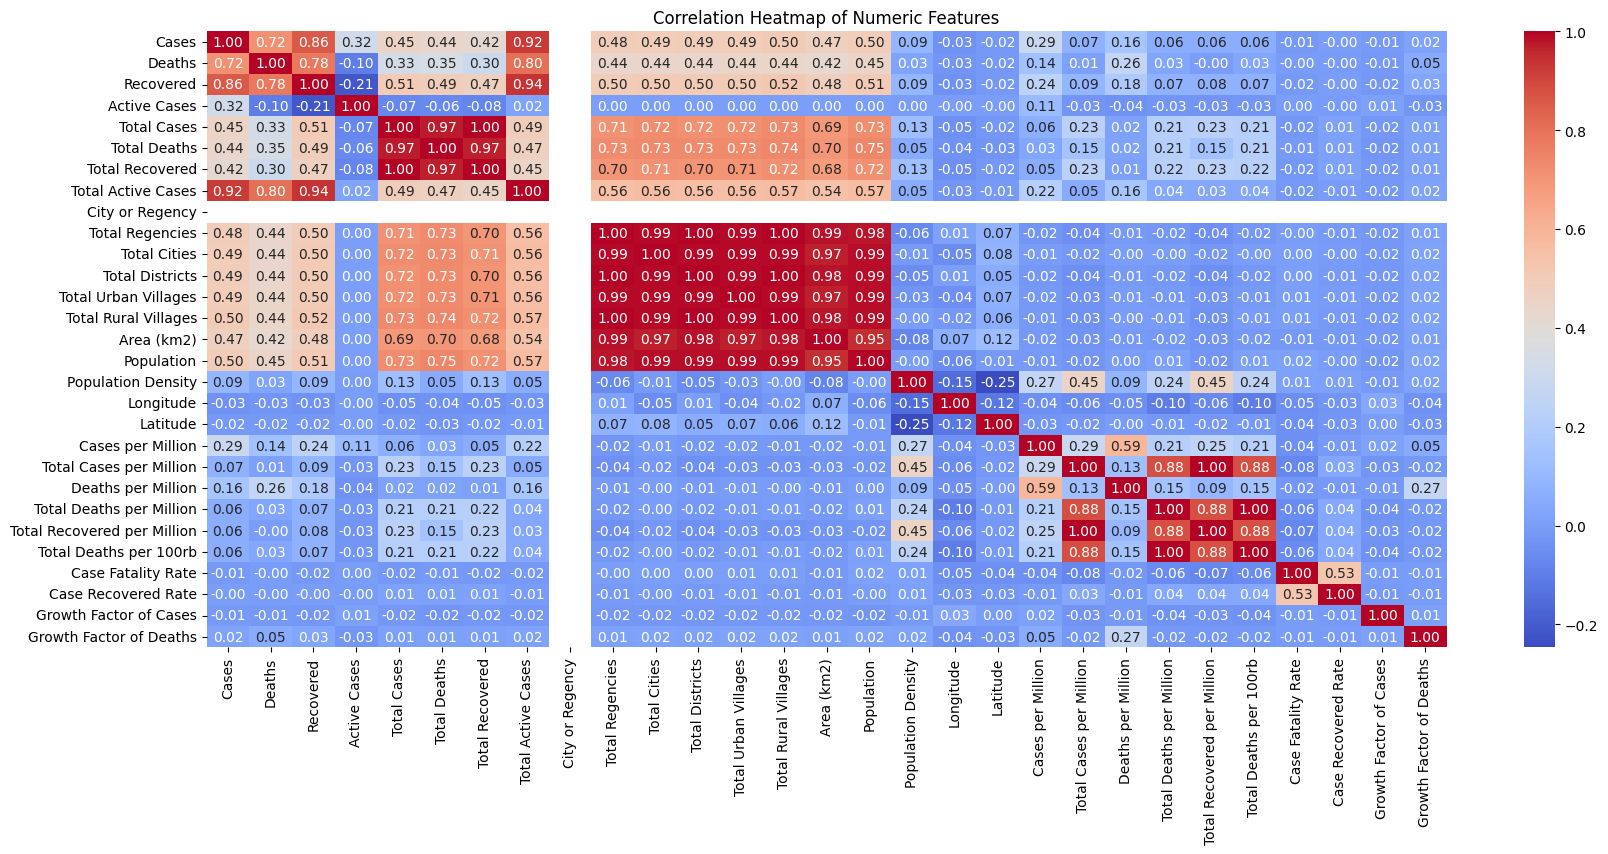

In [8]:
if df_heatmap.shape[1] >= 10:
    plt.figure(figsize=(20, 8))
    corr = df_heatmap.corr()# Menghitung matriks korelasi antar fitur numerik, Korelasi berkisar dari -1 (hubungan negatif sempurna) hingga +1 (hubungan positif sempurna), dengan 0 menunjukkan tidak ada hubungan.
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm') # (data matriks dalam corr, annot=True --> Menampilkan nilai korelasi di dalam sel heatmap, fmt='.2f' -->Menampilkan angka dengan dua desimal,cmap='coolwarm' --. warna)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap.')
# sns.heatmap(df_heatmap, annot=True, fmt=".1f")

## **Drop Columns**

In [9]:
# di urutkan berdasarkan Province dan Date
df_cleane = df.sort_values(by=['Province','Date']).copy() # Pastikan ini sudah dilakukan
# 'Province','Date'

In [10]:
# Menghapus Nilai pada colums Province berdasarkan colums Location
# Data yang telah dibersihkan kemudian di copy dan indexnya dibuat ulang sesuai dengan banyaknya df.
df_cleane = df_cleane[df_cleane['Location'] != 'Indonesia'].copy().reset_index(drop=True)

In [11]:
# Delete columns yang memiliki data kosong, NAN yang > 30%
df_cleane = df.drop(columns=['Location ISO Code','Location','Active Cases','Location Level','City or Regency',
                             'Country','Continent', 'Island', 'Time Zone', 'Special Status',
                       'Longitude','Latitude','Cases per Million','Total Deaths per Million', 'Continent'])

## **Handling Values**

In [19]:
# Membersihkan nilai Active Cases yang minus dan Menyesuaikan dengan nilai baru.

# Fungsi apply() digunakan untuk menerapkan fungsi ke setiap elemen di kolom tersebut.
# lambda x: max(0, x) adalah fungsi anonim yang:
# Mengembalikan x jika x ≥ 0.
# Mengembalikan 0 jika x < 0.
# Dengan kata lain, semua nilai negatif akan diubah menjadi nol.

if 'Total Active Cases' in df_cleane.columns:
      df_cleane['Total Active Cases'] = df_cleane['Total Active Cases'].apply(lambda x: x if x >= 0 else 0)

## **Convert Data Type**

In [20]:
# Convert Dtype Colums Date dari object to Datetime
df_cleane['Date'] = pd.to_datetime(df_cleane['Date'])

## **Create New Feature**

In [21]:
# Mengekstak fitur dari date menggunakan atribut dt (datetime)

# Untuk Hari dalam Seminggu: # Perhatikan bahwa dayofweek mengembalikan integer (0=Senin, 6=Minggu).
# Jika Anda ingin label string ('Senin', 'Selasa', dll.), Anda perlu memetakannya secara manual.

Day_of_week = df_cleane['Date'].dt.dayofweek.astype(np.int64) # Untuk menangkap pola harian (misalnya, perbedaan pelaporan kasus/kematian pada akhir pekan).
Month = df_cleane['Date'].dt.month.astype(np.int64) # Bulan (Month), Untuk menangkap pola musiman atau perubahan kebijakan/perilaku bulanan.
Year = df_cleane['Date'].dt.year.astype(np.int64) # (Day of Year),  Untuk pola tahunan yang lebih halus.

# insert() Berfungsi untuk menambahkan/menyisipkan kolom baru dengan posisi tertentu dalam DataFrame
df_cleane.insert(1, 'Day_of_week', Day_of_week)
df_cleane.insert(2, 'Month', Month)
df_cleane.insert(3, 'Year', Year)

# df_cleane['Day_of_week'] = df_cleane['Date'].dt.dayofweek # Untuk menangkap pola harian (misalnya, perbedaan pelaporan kasus/kematian pada akhir pekan).
# df_cleane['Month'] = df_cleane['Date'].dt.month # Bulan (Month), Untuk menangkap pola musiman atau perubahan kebijakan/perilaku bulanan.
# df_cleane['Year'] = df_cleane['Date'].dt.year # (Day of Year),  Untuk pola tahunan yang lebih halus.

# Contoh opsional: Mengubah angka hari dalam seminggu menjadi nama hari
# days_map = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
# df_predi_1['Day_Name'] = df_predi_1['Day_of_Week'].map(days_map)

In [22]:
# def create_time_since_outbreak_start(df_copy, date_col = 'Date', location_col = 'Province', cases_col = 'Total Cases'):
#     """
#     Menghitung jumlah hari sejak awal wabah untuk setiap lokasi.

#     Args:
#         df (pd.DataFrame): DataFrame input yang berisi data.
#         date_col (str): Nama kolom tanggal (harus bertipe datetime).
#         location_col (str): Nama kolom yang mengidentifikasi lokasi.
#         cases_col (str): Nama kolom yang menunjukkan jumlah kasus (e.g., 'Total Cases', 'Cases').

#     Returns:
#         pd.DataFrame: DataFrame dengan kolom 'Time_Since_Outbreak_Start' yang baru.
#     """
#     df_copy = df_copy.copy()

#     # # Urutkan data berdasarkan lokasi dan tanggal untuk memastikan perhitungan yang benar
#     df = df_copy.sort_values(by=[location_col, date_col])

#     # Temukan tanggal awal wabah (kasus pertama > 0) untuk setiap lokasi
#     first_cases_date = df_copy[df_copy[cases_col] > 0].groupby(location_col)[date_col].min()

#     # Gabungkan tanggal awal wabah kembali ke DataFrame utama
#     df_copy = df_copy.merge(first_cases_date.rename('Outbreak_Start_Date'), on=location_col, how='left')

#     # Hitung selisih hari dari tanggal awal wabah
#     # Jika Outbreak_Start_Date adalah NaN (artinya tidak ada kasus > 0 untuk lokasi itu), biarkan NaN atau isi dengan nilai default
#     df_copy['Time_Since_Outbreak_Start'] = (df_copy[date_col] - df_copy['Outbreak_Start_Date']).dt.days

#     # Hapus kolom temporer
#     df_copy = df_copy.drop(columns=['Outbreak_Start_Date'])

#     return df_copy

# df_cleane = create_time_since_outbreak_start(df_cleane,
#                                              date_col='Date',
#                                              location_col='Province', # Atau 'Location ISO Code'
#                                              cases_col='Total Cases') # Atau 'Cases' jika itu yang lebih dulu mencatat kasus

In [23]:
# # Membua colums Recovered per Million karna belum ada
# Recovered_per_Million = round((df_cleane['Recovered'] / df_cleane['Population']) * 1000000, 2)
# df_cleane.insert(19, 'Recovered per Million', Recovered_per_Million)

## **Encode Data**

In [24]:
from sklearn.preprocessing import LabelEncoder # merubah nilai label yang tadinya string menjadi int/float

le = LabelEncoder()
# df_cleane['Province_encoded'] = le.fit_transform(df_cleane['Province'])  # 'label' ganti dengan nama kolom aslinya

Province_encoded = le.fit_transform(df_cleane['Province'])  # 'label' ganti dengan nama kolom aslinya
df_cleane.insert(4, 'Province_encoded', Province_encoded)

In [25]:
# # Identifikasi nama-nama kolom numerik
# numerical_features = df_cleane.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Identifikasi nama-nama kolom kategorikal
# categorical_features = df_cleane.select_dtypes(include=['object']).columns.tolist()

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder # Impor OneHotEncoder # Atau MinMaxScaler
# # Membuat preprocessor menggunakan ColumnTransformer
# # Ini memungkinkan kita menerapkan transformasi berbeda ke kolom berbeda

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), df_cleane.select_dtypes(include=['int64', 'float64'])), # Menerapkan StandardScaler pada kolom numerik
#         ('Encode', OneHotEncoder(), df_cleane.select_dtypes(include=['object'])) # Menerapkan LabelEncoder pada kolom kategorikal
#     ])

## **Outlier Handling**

Dalam konteks deteksi outlier, outlier/anomali tidak dapat membentuk kluster padat karena estimator yang tersedia mengasumsikan bahwa outlier/anomali adalah terletak di daerah dengan kepadatan rendah.

In [26]:
# Copy df
# check_oulier = df.select_dtypes(include=['Int64','float64']).columns

In [27]:
df_test = df_cleane.drop(columns=['Province'])

In [28]:
df_test

,Date,Day_of_week,Month,Year,Province_encoded,Cases,Deaths,Recovered,Total Cases,Total Deaths,...,Population,Population Density,Total Cases per Million,Deaths per Million,Total Recovered per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of Cases,Growth Factor of Deaths
0,2020-03-01,6,3,2020,4,2,0,0,39,20,...,10846145,16334.31,3.60,0.0,6.91,0.18,51.28,1.9231,1.326795,1.033834
1,2020-03-02,0,3,2020,4,2,0,0,41,20,...,10846145,16334.31,3.78,0.0,6.91,0.18,48.78,1.8293,1.000000,1.000000
2,2020-03-02,0,3,2020,34,2,0,0,2,0,...,265185520,138.34,0.01,0.0,0.00,0.00,0.00,0.0000,1.326795,1.033834
3,2020-03-02,0,3,2020,25,1,0,0,1,0,...,6074100,69.80,0.16,0.0,0.16,0.00,0.00,1.0000,1.326795,1.033834
4,2020-03-03,1,3,2020,4,2,0,0,43,20,...,10846145,16334.31,3.96,0.0,6.91,0.18,46.51,1.7442,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,3,9,2022,30,37,0,0,52770,1213,...,2641884,190.17,19974.38,0.0,19303.27,45.91,2.30,0.9664,2.850000,1.000000
31818,2022-09-15,3,9,2022,31,13,0,3,104640,2371,...,5519245,131.37,18959.11,0.0,18492.75,42.96,2.27,0.9754,6.500000,1.000000
31819,2022-09-15,3,9,2022,32,16,0,1,82198,3376,...,8217551,89.72,10002.74,0.0,9553.94,41.08,4.11,0.9551,3.200000,1.000000
31820,2022-09-15,3,9,2022,33,50,0,5,158866,3288,...,14874889,203.82,10680.15,0.0,10415.14,22.10,2.07,0.9752,1.920000,1.000000


In [29]:
# 2. Convert ke long format, ini bertujuan untuk mengelompokkan DataFrame
df_comparasion = df_test.melt(
    id_vars='Date', # ini berisi Date yang digunakan sebagai
    var_name='Metric', # ini berisi nama kolom yang digunakan
    value_name='Value' # ini berisi nilai
)

In [30]:
df_comparasion.head()

,Date,Metric,Value
0,2020-03-01,Day_of_week,6.0
1,2020-03-02,Day_of_week,0.0
2,2020-03-02,Day_of_week,0.0
3,2020-03-02,Day_of_week,0.0
4,2020-03-03,Day_of_week,1.0


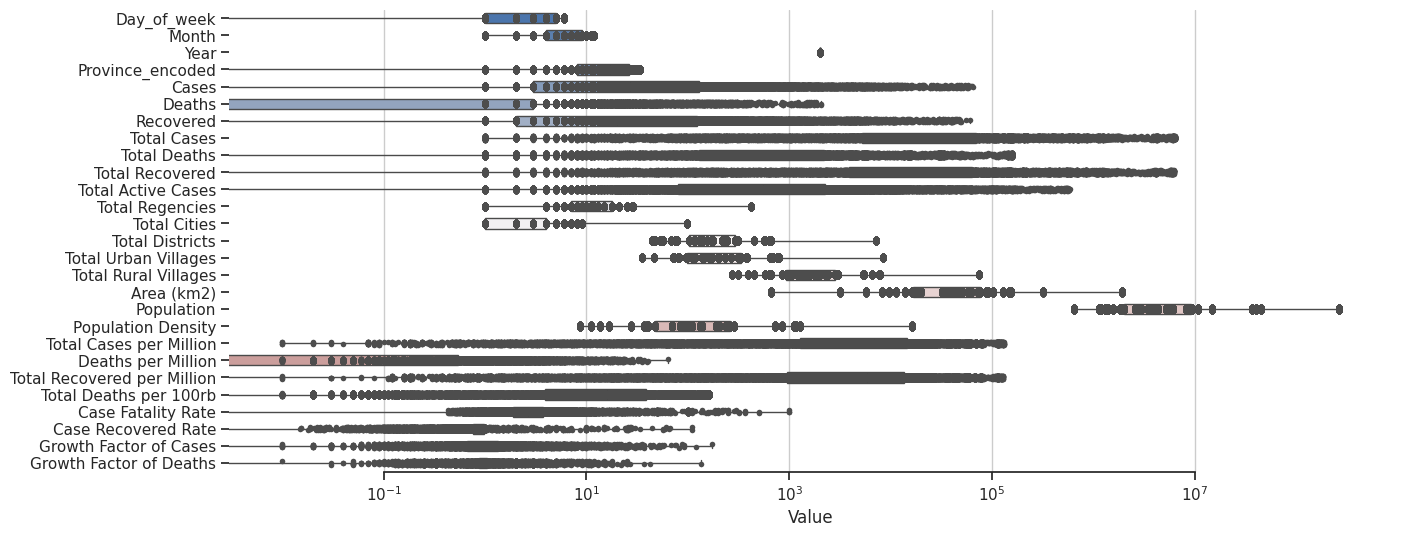

In [31]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_comparasion, x="Value", y="Metric", hue="Metric",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_comparasion, x="Value", y="Metric", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [32]:
# df_outlier = df_cleane.drop(columns=['Date','Location', 'Province', 'Country'])

In [33]:
# from sklearn.svm import OneClassSVM
# clf = OneClassSVM(gamma='auto', kernel='rbf', nu=0.5).fit(df_outlier)
# predictions = clf.predict(df_outlier) # Returns -1 for outliers and 1 for inliers.
# print("Predictions:", predictions)

df_test result = array([0.56390943, 0.56443989, 0.56455758, ..., 0.56421233, 0.56438   ,
       0.56387798])

In [34]:
# scores = clf.score_samples(df_outlier)
# print("Score Samples:", scores)

In [35]:
# Dapatkan ambang batas internal
# Perhatikan bahwa OneClassSVM tidak langsung memiliki atribut 'threshold_'.
# Amabang batas efektif untuk klasifikasi adalah -clf.offset_[0] atau terkait dengan skor terendah dari support vectors.
# Namun, konsep dasarnya adalah skor di bawah ambang batas (positif atau negatif) menjadi -1.

# Untuk memahami ambang batas secara implisit, kita bisa melihat skor dari support vectors
# atau secara manual menentukan cutoff untuk prediksi -1.
# Secara internal, OneClassSVM memprediksi -1 jika decision_function < 0
# setelah menyesuaikan dengan bias (offset_).

# mari kita hitung decision_function dan bandingkan dengan offset_
# decision_function_raw = clf.decision_function(df_outlier)
# print("Raw Decision Function:", decision_function_raw)

# Ambang batas sebenarnya untuk menentukan outlier adalah ketika raw decision function
# ditambah dengan offset_ menjadi kurang dari nol
# yaitu: raw_decision_function + clf.offset_ < 0
# Jadi, ambang batasnya secara efektif adalah -clf.offset_

## **Features Lagged CFR**

Peringatan Penting mengenai Deaths dan Recovered (tanpa _lag_N) sebagai Fitur saat Memprediksi Cases (dan sebaliknya):  
- Jika Anda memprediksi Cases harian (Y = Cases), dan Anda memasukkan Deaths (hari yang sama) atau Recovered (hari yang sama) sebagai fitur X, ini bisa menyebabkan data leakage. Artinya, model Anda akan menggunakan informasi yang seharusnya belum tersedia pada waktu prediksi.  
- Rekomendasi: Untuk memprediksi Cases hari t, Anda seharusnya hanya menggunakan data dari hari t-1 atau sebelumnya. Jadi, lebih aman untuk hanya menggunakan Deaths_lag_1 dan Recovered_lag_1 sebagai fitur, dan tidak menggunakan Deaths atau Recovered (tanpa lag) sebagai fitur saat memprediksi Cases. Ini berlaku juga sebaliknya (misalnya, tidak menggunakan Cases hari yang sama sebagai fitur saat memprediksi Deaths).

Berikut fitur-fitur yang digunakan sebagai input (X) untuk memprediksi CFR atau CRR (y): :

<!DOCTYPE html>
<html>
    <head>
    <style>
    table {
        border-style: hidden;  /* solid, dotted, dashed, double, groove, ridge, inset, outset, none, hidden */
        }
    </style>
    </head>
    <body>
        <table style="width: 65%;">
        <tr>
            <td>
            <table>
                <tr>
                <th>Kategori</th>
                <th>Kolom yang digunakan</th>
                </tr>
                    <tr>
                    <!-- # Baris TotaL Cases -->
                    <td> Waktu & Lokasi </td>
                    <td> Date, Province, Population, Population Desity, Area(km2)</td>
                    </tr>
                    <tr>
                    <td> Kasus Harian</td>
                    <td> Cases, Deaths, Recovered</td>
                    </tr>
                    <tr>
                    <td> Kasus Kumulatif </td>
                    <td> Total Cases, Total Deaths, Total Recovered, Total Active Cases </td>
                    </tr>
                    <tr>
                    <!-- # Baris TotaL Deaths -->
                    <td>Per 100rb/Million</td>
                    <td>Total Deaths per 100rb, Total Recovered per Million, Total Cases per Million, Deaths per Million</td>
                    </tr>
                    <tr>
                    <td>Pertumbuhan</td>
                    <td>Growth Factor of Cases, Growth Factor of Deaths</td>
                    </tr>
            </table>
            </td>
            <td>
    </body>
</html>

In [36]:
df_features_cfr = df_cleane.drop(columns=[
    'Population Density','Total Cases per Million',
    'Total Recovered per Million', 'Deaths per Million', 'Total Deaths per 100rb', 'Growth Factor of Cases', 'Growth Factor of Deaths'
])

In [37]:
df_features_cfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  31822 non-null  datetime64[ns]
 1   Day_of_week           31822 non-null  int64         
 2   Month                 31822 non-null  int64         
 3   Year                  31822 non-null  int64         
 4   Province_encoded      31822 non-null  int64         
 5   Cases                 31822 non-null  int64         
 6   Deaths                31822 non-null  int64         
 7   Recovered             31822 non-null  int64         
 8   Total Cases           31822 non-null  int64         
 9   Total Deaths          31822 non-null  int64         
 10  Total Recovered       31822 non-null  int64         
 11  Total Active Cases    31822 non-null  int64         
 12  Province              30893 non-null  object        
 13  Total Regencies 

In [38]:
# Menggunakan metode rename(): Ini adalah metode yang paling umum dan fleksibel untuk mengganti nama kolom.
df_features_cfr = df_features_cfr.rename(columns={'Day_of_week': 'Day of week'})
df_features_cfr = df_features_cfr.rename(columns={'Province_encoded': 'Province encoded'})
# df_features_cfr = df_features_cfr.rename(columns={'Time_Since_Outbreak_Start': 'Time Since Outbreak Start'})

In [39]:
# Membuat lagged features Case Fatality Rate

columns_to_lag = [
    'Cases', # Kematian biasanya mengikuti kenaikan kasus
    'Deaths', # Untuk melihat tren kematian sebelumnya
    'Recovered', # 	Sebagai kontra-penanda terhadap kematian
    'Total Cases', # 	Untuk mendeteksi perubahan jangka pendek
    'Total Deaths', # 	Untuk melihat rasio secara lebih stabil
    'Total Active Cases',
    # 'Total Recovered' # 	Indikator tekanan sistem kesehatan
]

# delta_lag = [
#       'Cases', # Pemulihan biasanya mengikuti kasus
#       'Recovered', # Melihat kecepatan pemulihan dari hari sebelumnya
#       'Deaths', # Untuk melihat tren kematian sebelumnya
#       'Total Active Cases', # 	Untuk menangkap tren kenaikan pemulihan
# ]

# Definisi ukuran lag yang ingin Anda coba
lags = [14, 21, 28] # Contoh lags

for col in columns_to_lag:
  if col in df_features_cfr.columns: # Pastikan kolom ada di DataFrame Anda
    for lag in lags:
      new_col_name = f'{col}_lag_{lag}_Days'
      # Pastikan untuk melakukan groupby pada lokasi sebelum shift
      df_features_cfr[new_col_name] = df_features_cfr.groupby('Province')[col].shift(lag)
      # if lag == 1 and col in delta_lag:
      #   df_features_cfr[f"{col}_delta_{lag}"] = (df_features_cfr[col] - df_features_cfr[new_col_name]).clip(lower = 0)
      # Jika kolom yang dilagged adalah CFR/CRR dan tipenya object, Anda perlu mengkonversinya
      if 'Rate' in col and df_features_cfr[new_col_name].dtype == 'bject':
        df_features_cfr[new_col_name] = pd.to_numeric(
            df_features_cfr[new_col_name].astype(str).str.replace(',','.').str.replace('%',''),
            errors='coerce'
            )

# Moving Average Cases, Deaths and Recovered
# .shift(1) di sini untuk memastikan bahwa MA adalah dari hari sebelumnya,
# menghindari kebocoran data untuk prediksi hari ini. min_periods=1 agar tidak NaN di awal.
Cases_7_Day_MA = df_features_cfr.groupby('Province')['Cases'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Melihat tren infeksi mingguan
Deaths_7_Day_MA = df_features_cfr.groupby('Province')['Deaths'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Melit=hat tren kematian mingguan
Recovered_7_Day_MA = df_features_cfr.groupby('Province')['Recovered'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # melihat tren pemulihan
Total_Active_Cases_7d_MA = df_features_cfr.groupby('Province')['Total Active Cases'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Untuk deteksi tekanan sistem secara mingguan

df_features_cfr.insert(7, 'Cases 7 Day MA', Cases_7_Day_MA)
df_features_cfr.insert(8, 'Deaths 7 Day MA', Deaths_7_Day_MA)
df_features_cfr.insert(9, 'Recovered 7 Day MA', Recovered_7_Day_MA)
df_features_cfr.insert(10, 'Total Active Cases 7 Day MA', Total_Active_Cases_7d_MA)

In [40]:
# columns_to_lag = [
#     'Cases_delta_1', # Kematian biasanya mengikuti kenaikan kasus
#     'Deaths_delta_1', # Untuk melihat tren kematian sebelumnya
#     'Recovered_delta_1', # 	Sebagai kontra-penanda terhadap kematian
#     'Total Active Cases_delta_1' # 	Indikator tekanan sistem kesehatan
# ]

# # Definisi ukuran lag yang ingin Anda coba
# rolling_windows = [7, 14]

# for col in columns_to_lag:
#   if col in df_features_cfr.columns: # Pastikan kolom ada di DataFrame Anda
#     for window in rolling_windows:
#       roll_mean = f'{col}_{window}d_Mean'
#       roll_std = f'{col}_{window}d_Std'

#       # Pastikan untuk melakukan groupby pada lokasi sebelum shift
#       df_features_cfr[roll_mean] = df_features_cfr.groupby('Province')[col].transform(lambda x: x.rolling(window).mean()) # Melihat tren infeksi mingguan
#       df_features_cfr[roll_std] = df_features_cfr.groupby('Province')[col].transform(lambda x: x.rolling(window).std()) # Melihat tren infeksi mingguan

#       # Jika kolom yang dilagged adalah CFR/CRR dan tipenya object, Anda perlu mengkonversinya
#       if 'Rate' in col and df_features_cfr[roll_mean].dtype == 'bject':
#         df_features_cfr[roll_mean] = pd.to_numeric(
#             df_features_cfr[roll_mean].astype(str).str.replace(',','.').str.replace('%',''),
#             errors='coerce'
#             )
#       elif 'Rate' in col and df_features_cfr[roll_std].dtype == 'bject':
#         df_features_cfr[roll_std] = pd.to_numeric(
#             df_features_cfr[roll_std].astype(str).str.replace(',','.').str.replace('%',''),
#             errors='coerce'
#             )

In [41]:
df_features_cfr = df_features_cfr.drop(columns=['Province'])

In [42]:
# Check nilai NaN atau Kosong dalam Data Frame
print(df_features_cfr.isnull().sum().sort_values(ascending=False))

Total Active Cases_lag_28_Days    1881
Recovered_lag_28_Days             1881
Total Cases_lag_28_Days           1881
Total Deaths_lag_28_Days          1881
Deaths_lag_28_Days                1881
Cases_lag_28_Days                 1881
Cases_lag_21_Days                 1643
Recovered_lag_21_Days             1643
Total Deaths_lag_21_Days          1643
Total Cases_lag_21_Days           1643
Deaths_lag_21_Days                1643
Total Active Cases_lag_21_Days    1643
Total Deaths_lag_14_Days          1405
Recovered_lag_14_Days             1405
Total Active Cases_lag_14_Days    1405
Deaths_lag_14_Days                1405
Cases_lag_14_Days                 1405
Total Cases_lag_14_Days           1405
Deaths 7 Day MA                    963
Total Active Cases 7 Day MA        963
Recovered 7 Day MA                 963
Cases 7 Day MA                     963
Total Rural Villages               929
Total Urban Villages               904
Total Cities                       901
Month                    

In [43]:
# Penanganan Nilai NaN dari hasil shift(), dengan menghapus baris-baris ini karena mereka tidak memiliki data historis yang cukup untuk prediksi.
df_features_cfr.dropna(inplace=True)
df_features_cfr.reset_index(drop=True, inplace=True)

In [44]:
# Check kembali ada nilai NaN atau Kosong dalam Data Frmae
print(df_features_cfr.isnull().sum().sort_values(ascending=False))

Date                              0
Day of week                       0
Month                             0
Year                              0
Province encoded                  0
Cases                             0
Deaths                            0
Cases 7 Day MA                    0
Deaths 7 Day MA                   0
Recovered 7 Day MA                0
Total Active Cases 7 Day MA       0
Recovered                         0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Total Regencies                   0
Total Cities                      0
Total Districts                   0
Total Urban Villages              0
Total Rural Villages              0
Area (km2)                        0
Population                        0
Case Fatality Rate                0
Case Recovered Rate               0
Cases_lag_14_Days                 0
Cases_lag_21_Days                 0
Cases_lag_28_Days           

In [45]:
for col in df_features_cfr.columns:
  min_max = df_features_cfr[col].agg(['min','max'])
  print(min_max)

min   2020-03-30
max   2022-09-15
Name: Date, dtype: datetime64[ns]
min    0
max    6
Name: Day of week, dtype: int64
min     1
max    12
Name: Month, dtype: int64
min    2020
max    2022
Name: Year, dtype: int64
min     1
max    33
Name: Province encoded, dtype: int64
min        0
max    16251
Name: Cases, dtype: int64
min      0
max    545
Name: Deaths, dtype: int64
min        0.000000
max    13110.571429
Name: Cases 7 Day MA, dtype: float64
min      0.000000
max    432.428571
Name: Deaths 7 Day MA, dtype: float64
min        0.000000
max    15555.714286
Name: Recovered 7 Day MA, dtype: float64
min         0.000000
max    185565.714286
Name: Total Active Cases 7 Day MA, dtype: float64
min        0
max    22667
Name: Recovered, dtype: int64
min          3
max    1173731
Name: Total Cases, dtype: int64
min        0
max    33489
Name: Total Deaths, dtype: int64
min          1
max    1144358
Name: Total Recovered, dtype: int64
min         0
max    188636
Name: Total Active Cases, dtype: i

In [46]:
# minus_lag = ['Cases_delta_1','Recovered_delta_1']

# for col in df_features_cfr.select_dtypes('float64').columns:
#    if col in df_features_cfr.columns:  # Pastikan kolom ada
#         df_features_cfr[col] = df_features_cfr[col].apply(lambda x: x if x >= 0 else 0)

In [47]:
# Membuat Data perhitungan min max value di convert ke CSV.
# cek_min_max_values.to_csv("min_max.csv")

In [48]:
# check duplicated table
df_features_cfr.duplicated().sum()

np.int64(0)

## **Feature Lagged CRR**

Peringatan Penting mengenai Deaths dan Recovered (tanpa _lag_N) sebagai Fitur saat Memprediksi Cases (dan sebaliknya):  
- Jika Anda memprediksi Cases harian (Y = Cases), dan Anda memasukkan Deaths (hari yang sama) atau Recovered (hari yang sama) sebagai fitur X, ini bisa menyebabkan data leakage. Artinya, model Anda akan menggunakan informasi yang seharusnya belum tersedia pada waktu prediksi.  
- Rekomendasi: Untuk memprediksi Cases hari t, Anda seharusnya hanya menggunakan data dari hari t-1 atau sebelumnya. Jadi, lebih aman untuk hanya menggunakan Deaths_lag_1 dan Recovered_lag_1 sebagai fitur, dan tidak menggunakan Deaths atau Recovered (tanpa lag) sebagai fitur saat memprediksi Cases. Ini berlaku juga sebaliknya (misalnya, tidak menggunakan Cases hari yang sama sebagai fitur saat memprediksi Deaths).

In [49]:
df_features_crr = df_cleane.drop(columns=[
    'Deaths','Total Deaths', 'Deaths per Million','Total Deaths per 100rb',
    'Growth Factor of Cases', 'Growth Factor of Deaths'
])

In [50]:
df_features_crr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Day_of_week                  31822 non-null  int64         
 2   Month                        31822 non-null  int64         
 3   Year                         31822 non-null  int64         
 4   Province_encoded             31822 non-null  int64         
 5   Cases                        31822 non-null  int64         
 6   Recovered                    31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Recovered              31822 non-null  int64         
 9   Total Active Cases           31822 non-null  int64         
 10  Province                     30893 non-null  object        
 11  Total Regencies              31822 non-nu

In [51]:
# Menggunakan metode rename(): Ini adalah metode yang paling umum dan fleksibel untuk mengganti nama kolom.
df_features_crr = df_features_crr.rename(columns={'Day_of_week': 'Day of week'})
df_features_crr = df_features_crr.rename(columns={'Province_encoded': 'Province encoded'})

In [52]:
# Membuat lagged features

columns_to_lag = [
    'Cases', # Pemulihan biasanya mengikuti kasus
    'Recovered', # Melihat kecepatan pemulihan dari hari sebelumnya
    'Total Cases', # Penanda beban kumulatif kasus
    'Total Recovered', # 	Untuk menangkap tren kenaikan pemulihan
    'Total Active Cases'
    # 'Case Recovered Rate' # Lag-nya sendiri bisa menjadi indikator tren perbaikan atau kemunduran
]

# delta_lag = [
#       'Cases', # Pemulihan biasanya mengikuti kasus
#       'Recovered', # Melihat kecepatan pemulihan dari hari sebelumnya
#       'Total Recovered', # 	Untuk menangkap tren kenaikan pemulihan
# ]

# Definisi ukuran lag yang ingin Anda coba
lags = [1, 7, 14, 21, 28] # Contoh lags
# roll_windows = [7, 14]

for col in columns_to_lag:
  if col in df_features_crr.columns: # Pastikan kolom ada di DataFrame Anda
    for lag in lags:
      new_col_name = f'{col}_lag_{lag}_Days'
      # Pastikan untuk melakukan groupby pada lokasi sebelum shift
      df_features_crr[new_col_name] = df_features_crr.groupby('Province')[col].shift(lag)
      # if lag == 1 and col in delta_lag:
      #   df_features_crr[f"{col}_delta_{lag}"] = (df_features_crr[col] - df_features_crr[new_col_name]).clip(lower = 0)
      # Jika kolom yang dilagged adalah CFR/CRR dan tipenya object, Anda perlu mengkonversinya
      if 'Rate' in col and df_features_crr[new_col_name].dtype == 'bject':
        df_features_crr[new_col_name] = pd.to_numeric(
            df_features_crr[new_col_name].astype(str).str.replace(',','.').str.replace('%',''),
            errors='coerce'
            )

# Moving Average Cases, Deaths and Recovered
# .shift(1) di sini untuk memastikan bahwa MA adalah dari hari sebelumnya,
# menghindari kebocoran data untuk prediksi hari ini. min_periods=1 agar tidak NaN di awal.

Cases_7_Day_MA = df_features_crr.groupby('Province')['Cases'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Kasus harian fluktuatif, MA membantu menstabilkan tren
Recovered_7_Day_MA = df_features_crr.groupby('Province')['Recovered'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Pemulihan bisa bervariasi tergantung pelaporan
Total_Active_Cases_7d_MA = df_features_crr.groupby('Province')['Total Active Cases'].transform(lambda x: x.rolling(window=7, min_periods = 1).mean().shift(1)) # Indikasi tekanan sistem kesehatan yang memengaruhi pemulihan

df_features_crr.insert(7, 'Cases 7 Day MA', Cases_7_Day_MA)
df_features_crr.insert(8, 'Recovered 7 Day MA', Recovered_7_Day_MA)
df_features_crr.insert(9, 'Total Active Cases 7 Day MA', Total_Active_Cases_7d_MA)

In [53]:
# def create_lag_delta_rolling(df_features_crr, col_name, roll_windows=[7, 14]):
#     for win in roll_windows:
#         df_features_crr[f"{col_name}_roll_mean_{win}"] = df_features_crr.groupby("Province")[col_name].transform(lambda x: x.rolling(win).mean())
#         df_features_crr[f"{col_name}_roll_std_{win}"] = df_features_crr.groupby("Province")[col_name].transform(lambda x: x.rolling(win).std())
#     return df_features_crr

In [54]:
df_features_crr = df_features_crr.drop(columns=['Province'])

In [55]:
# Check nilai NaN atau Kosong dalam Data Frame
# print(df_features_crr.isnull().sum().sort_values(ascending=False))

In [56]:
# Penanganan Nilai NaN dari hasil shift(), dengan menghapus baris-baris ini karena mereka tidak memiliki data historis yang cukup untuk prediksi.
df_features_crr.dropna(inplace=True)
df_features_crr.reset_index(drop=True, inplace=True)

In [57]:
# min_max = df_features_crr[['Cases_delta_1','Recovered_delta_1']].agg(['min','max'])
# print(min_max)

In [58]:
# Check nilai NaN atau Kosong dalam Data Frame
# print(df_features_crr.isnull().sum().sort_values(ascending=False))

In [59]:
# Membersihkan nilai Active Cases yang minus dan Menyesuaikan dengan nilai baru.

# Fungsi apply() digunakan untuk menerapkan fungsi ke setiap elemen di kolom tersebut.
# lambda x: max(0, x) adalah fungsi anonim yang:
# Mengembalikan x jika x ≥ 0.
# Mengembalikan 0 jika x < 0.
# Dengan kata lain, semua nilai negatif akan diubah menjadi nol.

# minus_lag = ['Cases_delta_1','Recovered_delta_1']

# for col in df_features_crr.select_dtypes('float64').columns:
#    if col in df_features_crr.columns:  # Pastikan kolom ada
#         df_features_crr[col] = df_features_crr[col].apply(lambda x: x if x >= 0 else 0)

In [60]:
# min_max = df_features_crr[['Cases_delta_1','Recovered_delta_1']].agg(['min','max'])
# print(min_max)

# **Modeling**

## **Import Model**

In [61]:
# import model
from sklearn.linear_model import LinearRegression, LassoLarsCV, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn import ensemble, tree
import xgboost as xgb
# import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

model_names = {
                # model_names.append(('LinearRegression',LinearRegression(n_jobs=-1)))
                # model_names.append(('Lasso', Lasso(alpha=np.float64(0.8041098932691477),tol=0.1, max_iter = 200, selection='cyclic', random_state=None, precompute=True, fit_intercept=True, warm_start=False, positive=False)))

                # # # Pastikan `cv` untuk LassoLarsCV juga TimeSeriesSplit jika itu yang Anda inginkan
                # 'LassoLarsCV':  LassoLarsCV(fit_intercept=True, verbose=False, max_iter= 600, precompute='auto', cv=10, max_n_alphas=500, n_jobs=-1, eps=np.float64(0.0777177806779764), copy_X=True, positive=False, ),

                'DecisionTreeRegressor':  tree.DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5, min_samples_split= 0.001, min_samples_leaf= 0.005, min_weight_fraction_leaf=0.0,
                                                                     max_features=1.0, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.01),

                # # Parameter Terbaik: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 0.001, 'regressor__max_features': 1.0, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
                'GradientBoostingRegressor': ensemble.GradientBoostingRegressor(max_depth= 5, learning_rate=0.1, n_estimators=150, loss='squared_error', max_features = 1.0, subsample=0.8, criterion='friedman_mse', min_samples_split=5, min_samples_leaf=0.001, min_weight_fraction_leaf=0.0,
                                                                                          min_impurity_decrease=0.0, init=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.01 ),

                # # # # Parameter Terbaik: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 0.001, 'regressor__max_features': 1.0, 'regressor__max_depth': 50, 'regressor__criterion': 'absolute_error'}
                # 'RandomForestRegressor': ensemble.RandomForestRegressor(n_estimators = 150, criterion ='absolute_error', max_depth = 5, min_samples_split=5, min_samples_leaf = 0.001, min_weight_fraction_leaf=0.0,
                #                                                                    max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=-1,verbose=0, warm_start=False, ccp_alpha=0.01),

                # # # model_names.append(('LGBMRegressor', lgb.LGBMRegressor(max_depth=7, min_child_samples = 30, n_estimators= 150, learning_rate= 0.1, force_col_wise=True)))
                # model_names.append(('SVR_Linear', SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, tol=0.001, C=1.0, epsilon=0.1,  cache_size=200, verbose=False, max_iter=-1)))

                # # # Dalam Scikit-Learn Epochs disebut max_iter, max_iter merupakan parameter pada model itu sendiri didalam konstruktor model. Contoh MLPRegressor
                # 'MLPRegressor': MLPRegressor(hidden_layer_sizes=(150,), activation='relu',solver='adam', alpha=0.01, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.1, power_t=0.5,
                                            # max_iter=1000, shuffle=True, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, random_state=42, beta_1=0.9, beta_2=0.999, max_fun=15000),

                # # # Inisialisasi model XGBoost  objective='reg:squarederror'
                # # # Parameter Terbaik: {'regressor__subsample': 0.5, 'regressor__reg_lambda': 1.0, 'regressor__n_estimators': 60, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1}
                'XGBRegressor' : xgb.XGBRegressor(objective='reg:squarederror', subsample = 0.05, reg_lambda = 0.1, n_estimators = 100, max_depth = 7, learning_rate = 0.1), # Contoh sederhana

                'HistGradientBoostingRegressor' : HistGradientBoostingRegressor(loss='squared_error',  learning_rate=0.1, max_iter=500, max_leaf_nodes=31, max_depth=7, min_samples_leaf=20, l2_regularization=0.0, max_features=1.0, max_bins=255,
                                                                                categorical_features='from_dtype', early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07,  random_state=42, ) # Contoh sederhana

                }



## **Prediction of CRR Indirectly**

In [62]:
df_test = df_features_cfr.copy()

In [63]:
df_test = df_test.dropna(subset=[ # Kode tersebut menghapus baris-baris dalam DataFrame df_test yang memiliki nilai NaN (kosong/missing) pada salah satu dari kolom-kolom tersebut.
    'Total Cases', 'Total Deaths',
    'Case Fatality Rate', 'Case Recovered Rate'
])

<Axes: >

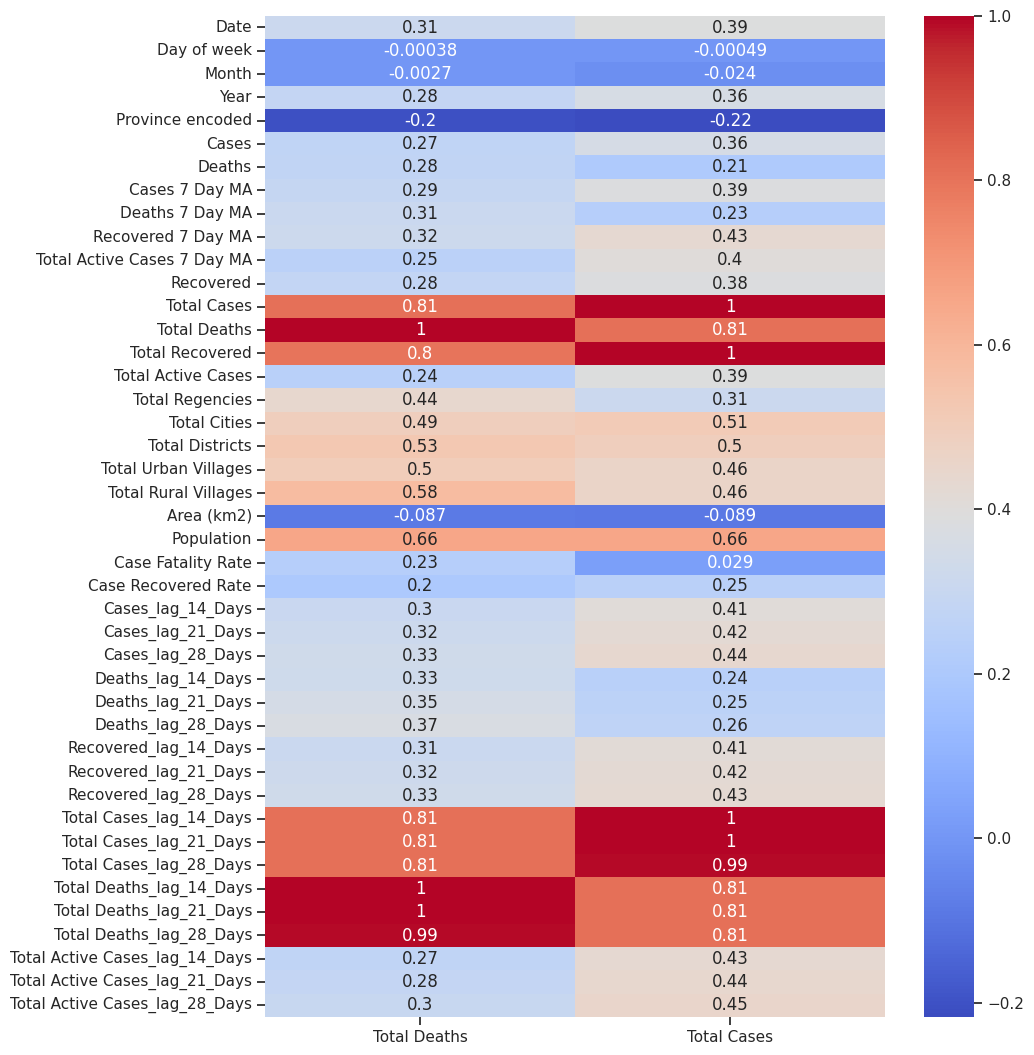

In [64]:
# Heatmap Correlation of Features with Target
corr = df_test.corr()
plt.figure(figsize=(10,13))
sns.heatmap(corr[['Total Deaths', 'Total Cases']], annot=True, cmap='coolwarm')

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27291 entries, 0 to 27290
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            27291 non-null  datetime64[ns]
 1   Day of week                     27291 non-null  int64         
 2   Month                           27291 non-null  int64         
 3   Year                            27291 non-null  int64         
 4   Province encoded                27291 non-null  int64         
 5   Cases                           27291 non-null  int64         
 6   Deaths                          27291 non-null  int64         
 7   Cases 7 Day MA                  27291 non-null  float64       
 8   Deaths 7 Day MA                 27291 non-null  float64       
 9   Recovered 7 Day MA              27291 non-null  float64       
 10  Total Active Cases 7 Day MA     27291 non-null  float64       
 11  Re

In [66]:
# Split Data Train and Testing Deaths
features_deaths = df_test.drop(columns=[
    'Date','Day of week','Month','Total Cases','Total Deaths', 'Area (km2)','Province encoded', 'Case Fatality Rate', 'Case Recovered Rate',
])

target_cols = ['Total Cases', 'Total Deaths']
# Contoh: membagi data menjadi training dan testing set
# Definisikan tanggal batas split sebagai objek datetime
# Kenapa pembagian data tidak random, karena ini merupakan time series dimana model memprediksi berdasarkan runtutan waktu.
split_date = pd.to_datetime('2021-09-01')

# # # Lakukan split
train_df_deaths = df_test[df_test['Date'] < split_date].copy()  # Tambahkan .copy() untuk menghindari SettingWithCopyWarning
test_df_deaths = df_test[df_test['Date'] >= split_date].copy()   # Tambahkan .copy() untuk menghindari SettingWithCopyWarning

X_train_deaths = train_df_deaths[features_deaths.columns]
y_train_deaths = train_df_deaths[target_cols] # Disini hanya menggunkan columns target saja
X_test_deaths = test_df_deaths[features_deaths.columns]
y_test_deaths = test_df_deaths[target_cols] # Nilai Aktual

In [67]:
X_train_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15512 entries, 0 to 15511
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            15512 non-null  int64  
 1   Cases                           15512 non-null  int64  
 2   Deaths                          15512 non-null  int64  
 3   Cases 7 Day MA                  15512 non-null  float64
 4   Deaths 7 Day MA                 15512 non-null  float64
 5   Recovered 7 Day MA              15512 non-null  float64
 6   Total Active Cases 7 Day MA     15512 non-null  float64
 7   Recovered                       15512 non-null  int64  
 8   Total Recovered                 15512 non-null  int64  
 9   Total Active Cases              15512 non-null  int64  
 10  Total Regencies                 15512 non-null  int64  
 11  Total Cities                    15512 non-null  float64
 12  Total Districts                 15512

In [68]:
# CFR indirect: CFR = Total Deaths / Total Cases
# CRR indirect: CRR = Total Recovered / Total Cases
# Maka, kita prediksi Total Deaths, Total Recovered, dan Total Cases
# target_cols = ['Total Cases', 'Total Deaths']
# feature_cols = [col for col in df_test.columns if col not in [
#    'Date','Day of week','Month','Area (km2)','Province encoded', 'Case Fatality Rate', 'Case Recovered Rate',
# ] + target_cols]

# X = df_test[feature_cols].fillna(0)

In [69]:
# Buat model dan prediksi untuk setiap target
predictions = {}
actuals = {}

for name, model in model_names.items():

    predictions[name] = {}
    actuals[name] = {}

    print(f"\n============================")
    print(f"Model: {name}")
    print(f"============================")

    for target in target_cols:
        y_train = train_df_deaths[target]

        # Train Model
        model.fit(X_train_deaths, y_train)

        # Predict Model
        y_pred = model.predict(X_test_deaths)
        predictions[name][target] = y_pred

        for target_actual in target_cols:
          y_test = y_test_deaths[target]
          actuals[name][target] = y_test.values

        print(f"📊 Evaluation for {target}")
        print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
        print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
        print(f"R²   : {r2_score(y_test, y_pred)*100:.4f}\n")


Model: DecisionTreeRegressor
📊 Evaluation for Total Cases
MAE  : 24431.31
RMSE : 80954.27
R²   : 83.0512

📊 Evaluation for Total Deaths
MAE  : 1012.02
RMSE : 2500.80
R²   : 89.1599


Model: GradientBoostingRegressor
📊 Evaluation for Total Cases
MAE  : 16196.33
RMSE : 64657.83
R²   : 89.1881

📊 Evaluation for Total Deaths
MAE  : 639.30
RMSE : 1855.27
R²   : 94.0339


Model: XGBRegressor
📊 Evaluation for Total Cases
MAE  : 23348.19
RMSE : 92035.90
R²   : 78.0934

📊 Evaluation for Total Deaths
MAE  : 1122.71
RMSE : 3956.72
R²   : 72.8639


Model: HistGradientBoostingRegressor
📊 Evaluation for Total Cases
MAE  : 21450.04
RMSE : 85540.95
R²   : 81.0762

📊 Evaluation for Total Deaths
MAE  : 768.54
RMSE : 2111.81
R²   : 92.2699



Untuk memprediksi CFR, berikut merupakan formula yang digunakan :




$$ CFR\: = \frac {\:\:Total\:\:Deaths\:\:} {\:\:Total\:\:Cases\:\:} \: x \:100 $$

In [70]:
# Step 4: Hitung CFR dan CRR hasil prediksi
for model_name in predictions:
  cfr_pred = (predictions[model_name]['Total Deaths'] / predictions[model_name]['Total Cases']) * 100
  print(f"Hasil Predictions CFR Oleh {model_name} : {cfr_pred}")
# crr_pred = predictions['Total Recovered'] / predictions['Total Cases']

# Step 5: Evaluasi CFR dan CRR tidak langsung
for model_actual in actuals:
  cfr_actual = (actuals[model_actual]['Total Deaths'] / actuals[model_actual]['Total Cases']) * 100
  print(f"Nilai Actual / Real CFR : {cfr_actual}")
# crr_actual = actuals['Total Recovered'] / actuals['Total Cases']

print("\n🧪 Indirect Prediction Evaluation")
print(f"CFR MAE  : {mean_absolute_error(cfr_actual, cfr_pred)*100:.4f}")
print(f"CFR RMSE : {np.sqrt(mean_squared_error(cfr_actual, cfr_pred))*100:.4f}")
print(f"CFR R²   : {r2_score(cfr_actual, cfr_pred)*100:.4f}")

Hasil Predictions CFR Oleh DecisionTreeRegressor : [2.85166457 2.06549786 1.69666994 ... 2.32366893 5.17631016 1.88297792]
Hasil Predictions CFR Oleh GradientBoostingRegressor : [3.12272316 2.06733892 1.89416516 ... 2.20762002 4.0176742  2.04013568]
Hasil Predictions CFR Oleh XGBRegressor : [3.2658584 2.3242474 1.7859426 ... 1.8378325 3.8171597 1.9977465]
Hasil Predictions CFR Oleh HistGradientBoostingRegressor : [2.89847369 2.08258221 1.85158707 ... 2.20989124 4.56633776 2.08825256]
Nilai Actual / Real CFR : [3.29003199 2.02884191 1.96034851 ... 2.26586391 4.10715589 2.06966878]
Nilai Actual / Real CFR : [3.29003199 2.02884191 1.96034851 ... 2.26586391 4.10715589 2.06966878]
Nilai Actual / Real CFR : [3.29003199 2.02884191 1.96034851 ... 2.26586391 4.10715589 2.06966878]
Nilai Actual / Real CFR : [3.29003199 2.02884191 1.96034851 ... 2.26586391 4.10715589 2.06966878]

🧪 Indirect Prediction Evaluation
CFR MAE  : 24.6049
CFR RMSE : 58.5376
CFR R²   : 81.2773


## **Prediction of CRR Indirectly**

In [71]:
df_crr_test = df_features_crr.copy()

In [72]:
df_crr_test = df_crr_test.dropna(subset=[ # Kode tersebut menghapus baris-baris dalam DataFrame df_test yang memiliki nilai NaN (kosong/missing) pada salah satu dari kolom-kolom tersebut.
    'Total Cases', 'Total Recovered', 'Case Fatality Rate', 'Case Recovered Rate'
])

<Axes: >

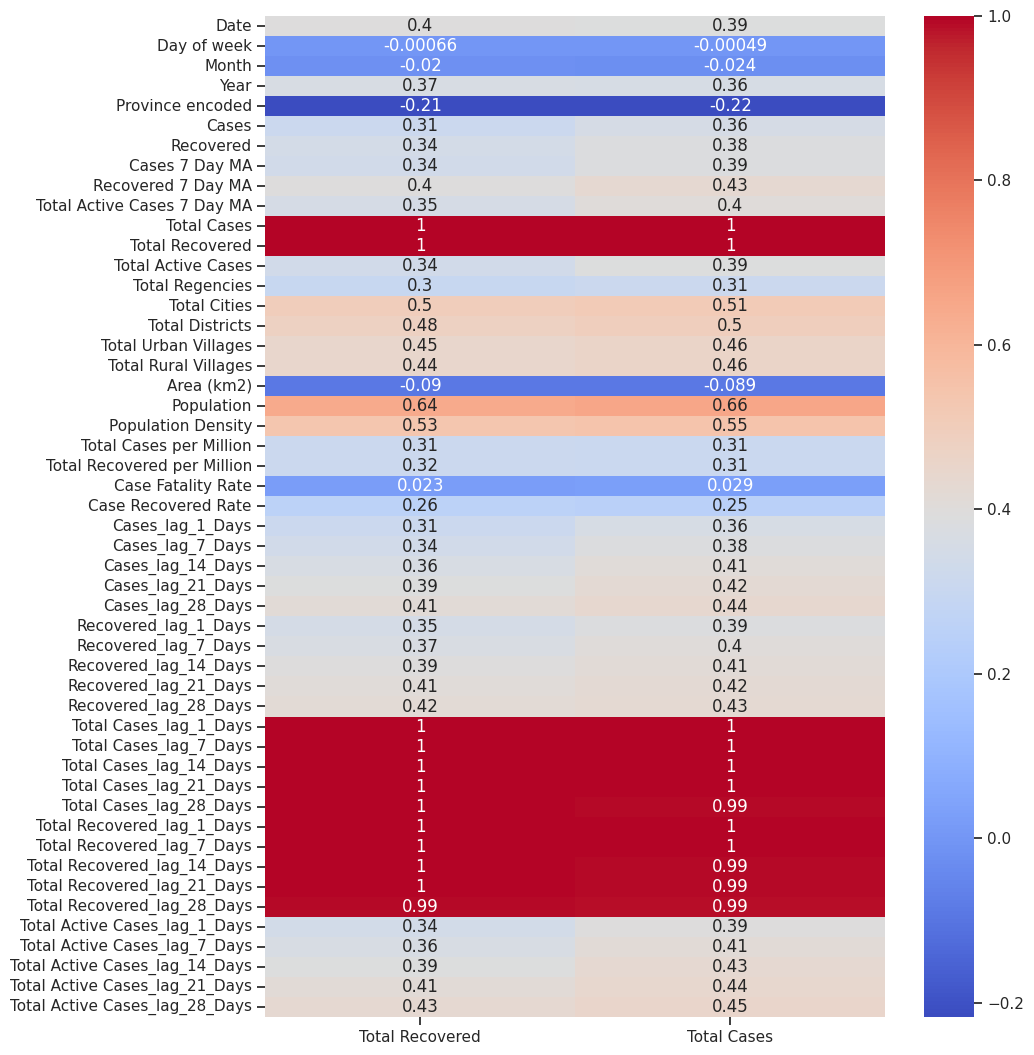

In [73]:
# Heatmap Correlation of Features with Target
corr = df_crr_test.corr()
plt.figure(figsize=(10,13))
sns.heatmap(corr[['Total Recovered', 'Total Cases']], annot=True, cmap='coolwarm')

In [74]:
# df_crr_test.info()

In [75]:
# df_crr_test['Total Recovered'] = np.log1p(df_crr_test['Total Recovered'])
# df_crr_test['Total Cases'] = np.log1p(df_crr_test['Total Cases'])

In [76]:
# CRR indirect: CRR = Total Recovered / Total Cases
# Maka, kita prediksi Total Deaths, Total Recovered, dan Total Cases

# target_cols = ['Total Cases', 'Total Recovered']
# feature_cols = [col for col in df_crr_test.columns if col not in [
#    'Date','Day of week', 'Month', 'Province encoded',
#    'Area (km2)', 'Case Fatality Rate', 'Case Recovered Rate', 'Total Cases per Million', 'Total Recovered per Million','Total Regencies',
# ] + target_cols]

# X = df_crr_test[feature_cols].fillna(0)

In [96]:
# Split Data Train and Testing Deaths
features_crr = df_crr_test.drop(columns=[
    'Date','Day of week','Month','Total Cases','Total Recovered', 'Area (km2)','Province encoded',
    'Area (km2)', 'Case Fatality Rate', 'Case Recovered Rate', 'Total Cases per Million', 'Total Recovered per Million','Total Regencies',
])

target_cols = ['Total Cases', 'Total Recovered']
# Contoh: membagi data menjadi training dan testing set
# Definisikan tanggal batas split sebagai objek datetime
# Kenapa pembagian data tidak random, karena ini merupakan time series dimana model memprediksi berdasarkan runtutan waktu.
split_date = pd.to_datetime('2021-07-01')

# # # Lakukan split
train_df= df_crr_test[df_crr_test['Date'] < split_date].copy()  # Tambahkan .copy() untuk menghindari SettingWithCopyWarning
test_df= df_crr_test[df_crr_test['Date'] >= split_date].copy()   # Tambahkan .copy() untuk menghindari SettingWithCopyWarning

X_train = train_df[features_crr.columns]
# y_train = train_df[target_cols] # Disini hanya menggunkan columns target saja
X_test = test_df[features_crr.columns]
# y_test = test_df[target_cols] # Nilai Aktual

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15512 entries, 0 to 15511
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            15512 non-null  int64  
 1   Cases                           15512 non-null  int64  
 2   Recovered                       15512 non-null  int64  
 3   Cases 7 Day MA                  15512 non-null  float64
 4   Recovered 7 Day MA              15512 non-null  float64
 5   Total Active Cases 7 Day MA     15512 non-null  float64
 6   Total Active Cases              15512 non-null  int64  
 7   Total Cities                    15512 non-null  float64
 8   Total Districts                 15512 non-null  int64  
 9   Total Urban Villages            15512 non-null  float64
 10  Total Rural Villages            15512 non-null  float64
 11  Population                      15512 non-null  int64  
 12  Population Density              15512

In [97]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Atau MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

scaler = StandardScaler()
# Buat model dan prediksi untuk setiap target
predictions = {}
actuals = {}

for name, model in model_names.items():

    predictions[name] = {}
    actuals[name] = {}

    print(f"\n============================")
    print(f"Model: {name}")
    print(f"============================")
    # Buat pipeline baru untuk SETIAP MODEL di dalam loop
    pipeline = Pipeline(steps=[ # <--- Beri nama yang lebih deskriptif
    ('scaler', scaler), # Menerapkan StandardScaler pada kolom numerik
    ('feature_selection', SelectKBest(score_func=f_regression, k=20)),
    ('regressor', model) # <--- GUNAKAN `model` DI SINI
    ])

    for target in target_cols:
        y_train = train_df[target]

        # Train Model
        # multi_model = MultiOutputRegressor(model)
        pipeline.fit(X_train, y_train)

        # Predict Model
        y_pred = pipeline.predict(X_test)
        predictions[name][target] = y_pred

        for target_actual in target_cols:
          y_test = test_df[target]
          actuals[name][target] = y_test.values

        print(f"📊 Evaluation for {target}")
        print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
        print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
        print(f"R²   : {r2_score(y_test, y_pred)*100:.4f}\n")


Model: DecisionTreeRegressor
📊 Evaluation for Total Cases
MAE  : 34300.99
RMSE : 122457.13
R²   : 57.9814

📊 Evaluation for Total Recovered
MAE  : 37174.07
RMSE : 128257.77
R²   : 48.8724


Model: GradientBoostingRegressor
📊 Evaluation for Total Cases
MAE  : 28620.80
RMSE : 114067.24
R²   : 63.5418

📊 Evaluation for Total Recovered
MAE  : 27744.32
RMSE : 113587.28
R²   : 59.8997


Model: XGBRegressor
📊 Evaluation for Total Cases
MAE  : 32958.38
RMSE : 125002.68
R²   : 56.2163

📊 Evaluation for Total Recovered
MAE  : 32986.09
RMSE : 124416.83
R²   : 51.8888


Model: HistGradientBoostingRegressor
📊 Evaluation for Total Cases
MAE  : 32614.79
RMSE : 122583.69
R²   : 57.8945

📊 Evaluation for Total Recovered
MAE  : 31672.40
RMSE : 120478.17
R²   : 54.8867



Untuk memprediksi CRR berikut merupakan formula yang digunakan :

$$ CRR\: = \frac {\:\:Total\:\:Recovered\:\:} {\:\:Total\:\:Cases\:\:} \: x \:100 $$

In [98]:
# Step 4: Hitung CRR hasil prediksi
for model_name in predictions:
  crr_pred = (predictions[model_name]['Total Recovered'] / predictions[model_name]['Total Cases']) * 100
  # print(f"Hasil Predictions CFR Oleh {model_name} : {crr_pred}")

# Step 5: EvaluasinCRR tidak langsung
for model_actual in actuals:
  crr_actual = (actuals[model_actual]['Total Recovered'] / actuals[model_actual]['Total Cases']) * 100
  # print(f"Nilai Actual / Real CFR : {crr_actual}")

# Step 6: Evaluasi Hasil CRR tidak langsung
print("\n🧪 Indirect Prediction Evaluation")
print(f"CRR MAE  : {mean_absolute_error(crr_actual, crr_pred)*100:.4f}")
print(f"CRR RMSE : {mean_squared_error(crr_actual, crr_pred, multioutput='uniform_average')*100:.4f}")
print(f"CRR R²   : {r2_score(crr_actual, crr_pred)*100:.4f}")


🧪 Indirect Prediction Evaluation
CRR MAE  : 220.7552
CRR RMSE : 1144.1986
CRR R²   : 77.2398


# **Conclusion**

<!DOCTYPE html>
<html>
    <body>
        <p style="text-align:justify ; font-size:90% ; margin: 30px ;">
        Berikut merupakan hasil evaluasi model dalam memprediksi CFR (Case Fatality Rate) dan CRR (Case Recovered Rate) dengan menggunakan pendekatan secara indirect prediction.</p>
        <ul style="text-align:justify ; font-size:90% ; margin: 30px; margin-top:0.0;">
            <li style="text-align:justify ;"> GradientBoostingRegressor menjadi model terbaik dalam memprediksi CFR (Case Fatality Rate) dan CRR (Case Recovered Rate) dengan hasil evaluasi paling konsisten untuk ke dua target. Di ikuti oleh HistgradientBoostingregressor yang memili hasil yang cukup baik dalam memprediksi CFR (Case Fatality Rate) dan CRR (Case Recovered Rate).</li>
            <li style="text-align:justify ;">R2 Score CFR (81.28%) lebih tinggi dibandingkan CRR (77.24%.), hal ini dikarenakan model dapat memprediksi Total Deaths lebih presisi dibandingkan dengan Total Recovered.</li>
            <li style="text-align:justify ;">Strategi pembagian waktu (split_date) mempengaruhi performa kedua target, dimana semakin banyak data latih maka model cenderung memiliki performa yang lebih baik.</li>
        </ul>
    </body>
</html>